In [1]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_anage = pl.read_csv("../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv("../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True)

In [3]:
df_anage.head()

HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
i64,str,str,str,str,str,str,str,str,i64,i64,i64,str,f64,f64,i64,f64,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str
3,"""Animalia""","""Arthropoda""","""Branchiopoda""","""Diplostraca""","""Daphniidae""","""Daphnia""","""pulicaria""","""Daphnia""",null,null,null,null,null,null,null,null,null,null,null,0.19,null,"""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""1294,1295,1296"""
5,"""Animalia""","""Arthropoda""","""Insecta""","""Diptera""","""Drosophilidae""","""Drosophila""","""melanogaster""","""Fruit fly""",7,7,null,null,null,null,null,null,null,null,null,0.3,null,"""captivity""","""large""","""acceptable""",0.05,0.04,null,null,null,"""2,20,32,47,53,68,69,240,241,24…"
6,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Apidae""","""Apis""","""mellifera""","""Honey bee""",null,null,null,null,null,null,null,null,null,null,null,8.0,"""812""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""63,407,408,741,805,806,808,812…"
8,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Cardiocondyla""","""obscurior""","""Cardiocondyla obscurior""",null,null,null,null,null,null,null,null,null,null,null,0.5,"""1293""","""captivity""","""medium""","""acceptable""",null,null,null,null,null,"""1293"""
9,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Lasius""","""niger""","""Black garden ant""",null,null,null,null,null,null,null,null,null,null,null,28.0,"""411""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""411,813,814"""


In [4]:
df_earthquakes.head()

UTC_Date,Profoundity_Km,Magnitude_Ml,Date,Hour,Location,Region,Latitude,Longitude
datetime[μs],f64,f64,date,time,str,str,f64,f64
2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,"""45 km al SE de Socaire""","""Antofagasta""",-23.958,-67.698
2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,"""57 km al E de Socaire""","""Antofagasta""",-23.8,-67.375
2024-03-01 08:27:13,26.0,2.9,2024-03-01,05:27:13,"""33 km al S de Huasco""","""Atacama""",-28.755,-71.288
2024-03-01 08:22:21,54.0,3.7,2024-03-01,05:22:21,"""49 km al SO de Huasco""","""Atacama""",-28.822,-71.52
2024-03-01 07:12:58,20.0,2.9,2024-03-01,04:12:58,"""16 km al SE de Los Vilos""","""Coquimbo""",-31.991,-71.376


<Axes: xlabel='Year', ylabel='n'>

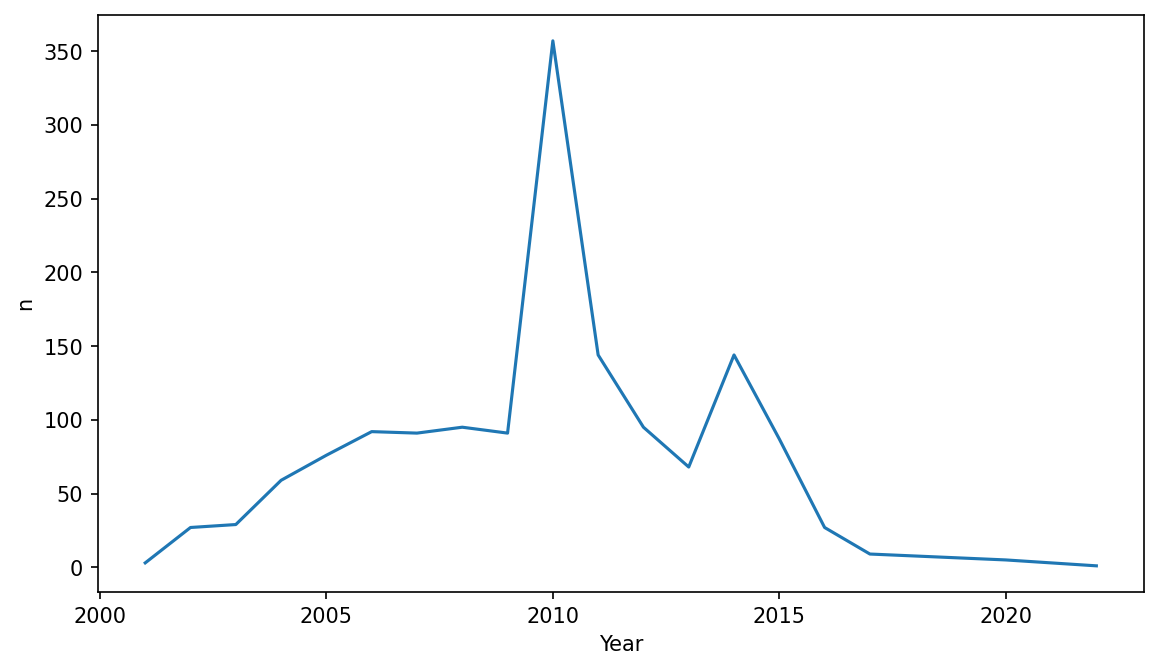

In [5]:
df_earthquakes_by_year = (
    df_earthquakes.filter(pl.col("Magnitude_Ml") >= 5)
    .group_by(
        Year=pl.col("Date").dt.year(),
    )
    .len("n")
)

plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(df_earthquakes_by_year, x="Year", y="n")

<Axes: xlabel='Year', ylabel='n'>

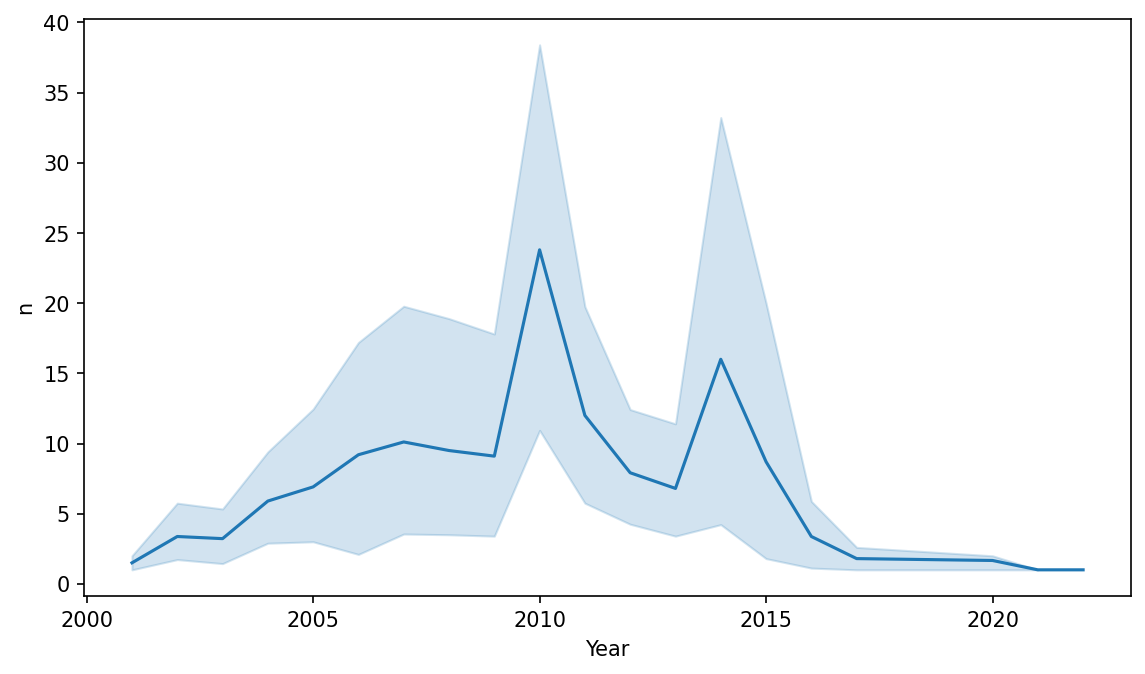

In [6]:
df_earthquakes_by_year = (
    df_earthquakes.filter(pl.col("Magnitude_Ml") >= 5)
    .group_by(
        "Region",
        Year=pl.col("Date").dt.year(),
    )
    .len("n")
)

plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(df_earthquakes_by_year, x="Year", y="n")

<Axes: xlabel='Year', ylabel='n'>

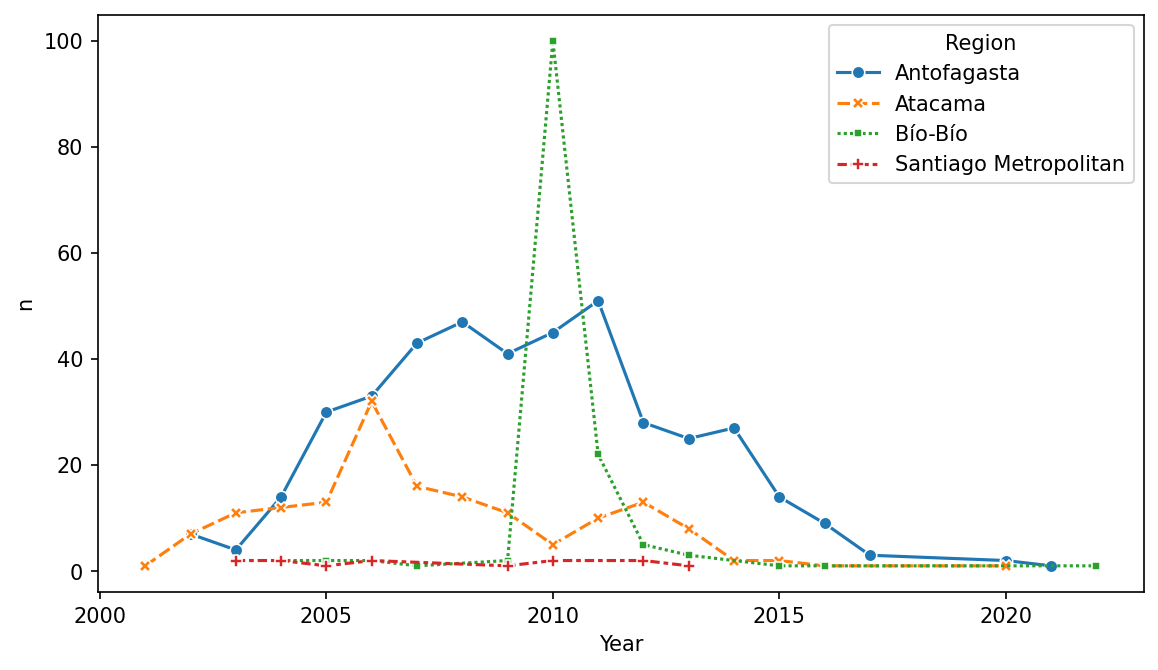

In [7]:
df_earthquakes_by_year_sub = df_earthquakes_by_year.filter(
    pl.col("Region").is_in(
        [
            "Bío-Bío",
            "Atacama",
            "Antofagasta",
            "Santiago Metropolitan",
        ]
    )
).sort("Region")

plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(
    df_earthquakes_by_year_sub,
    x="Year",
    y="n",
    hue="Region",
    style="Region",
    markers=True,
)

In [8]:
df_earthquakes_by_year_sub_cs = (
    df_earthquakes_by_year_sub.sort("Year")
    .with_columns(n_cumsum=pl.col("n").cum_sum().over("Region"))
    .sort("Region")
)

<Axes: xlabel='Year', ylabel='n_cumsum'>

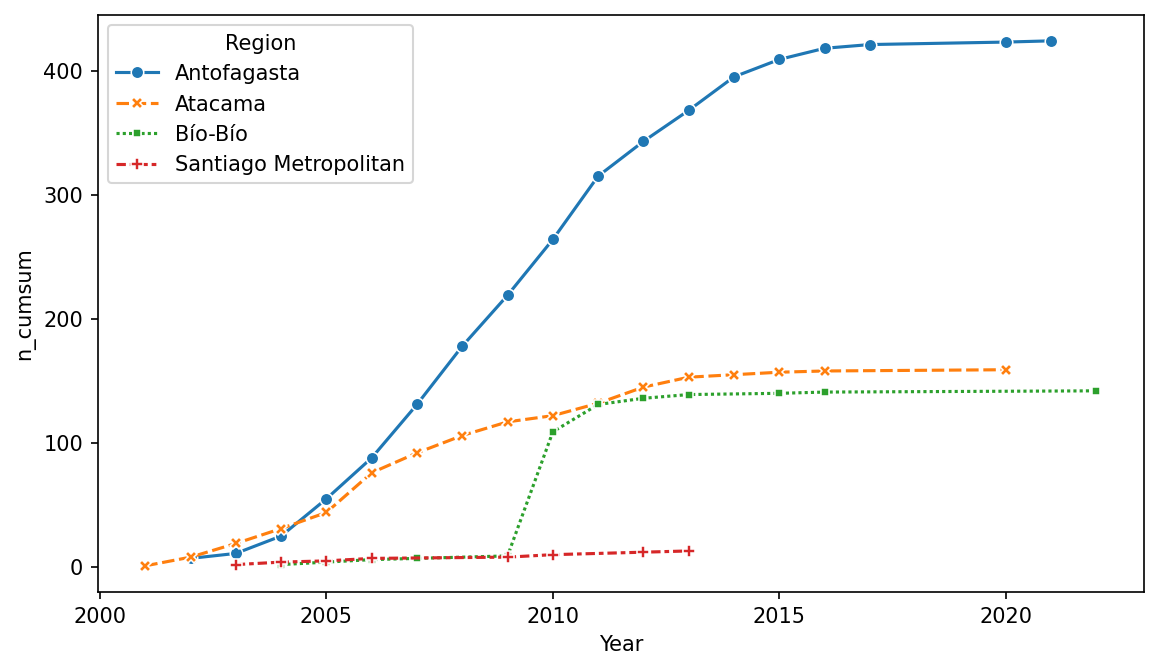

In [9]:
plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(
    df_earthquakes_by_year_sub_cs,
    x="Year",
    y="n_cumsum",
    hue="Region",
    style="Region",
    markers=True,
)

<Axes: xlabel='Year', ylabel='n_cumsum'>

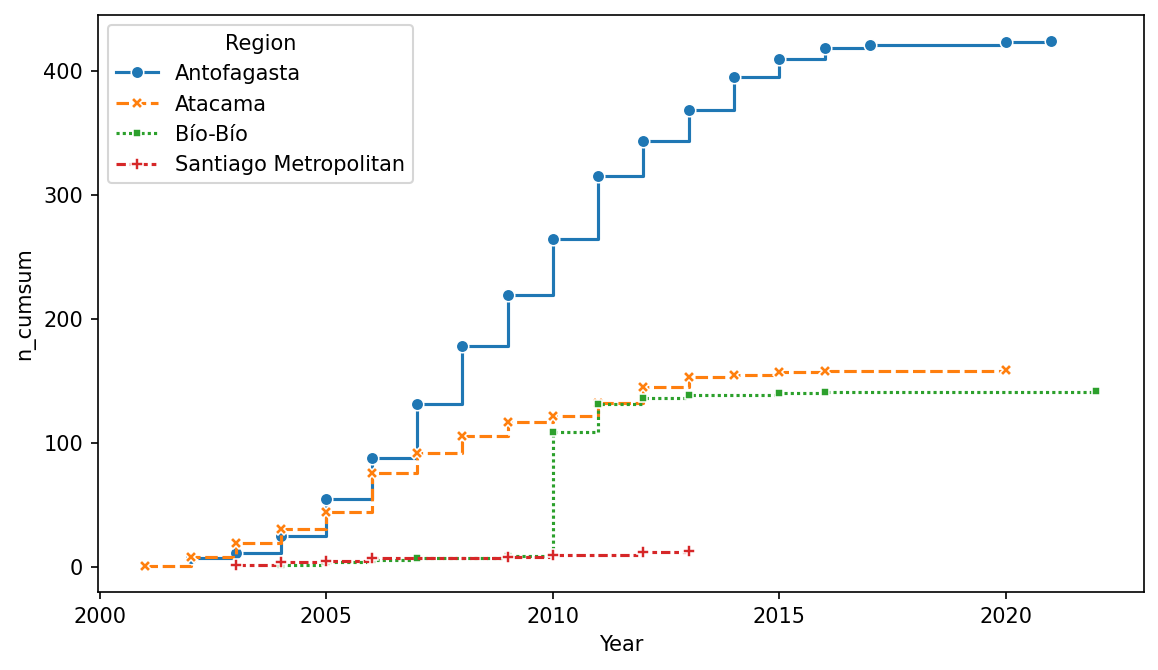

In [10]:
plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(
    df_earthquakes_by_year_sub_cs,
    x="Year",
    y="n_cumsum",
    hue="Region",
    style="Region",
    markers=True,
    drawstyle="steps-post",
)

<Axes: xlabel='Year', ylabel='n'>

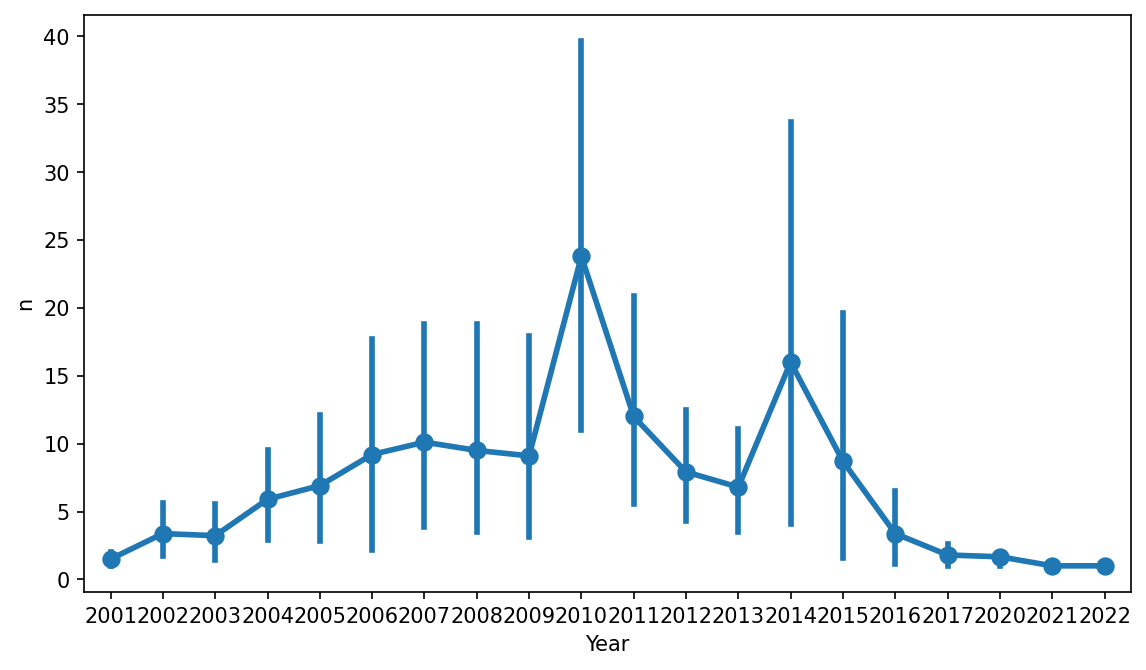

In [12]:
plt.figure(figsize=(9, 5), dpi=150)
sns.pointplot(df_earthquakes_by_year, x="Year", y="n")

<Axes: xlabel='Year', ylabel='n'>

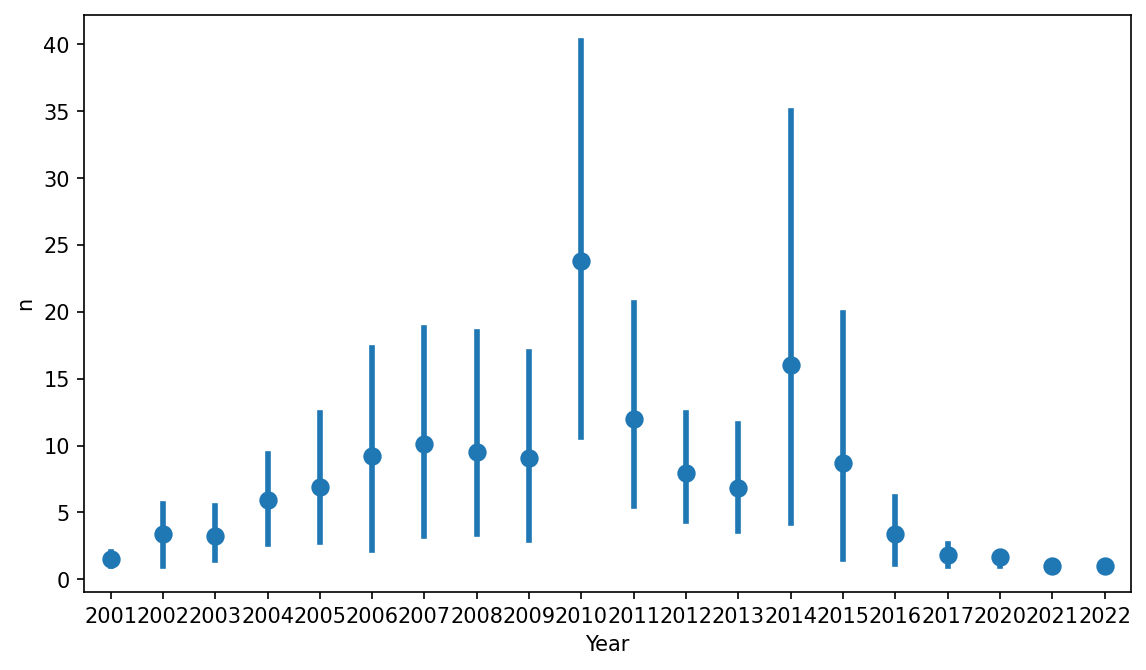

In [13]:
plt.figure(figsize=(9, 5), dpi=150)
sns.pointplot(df_earthquakes_by_year, x="Year", y="n", linestyle="none")

<Axes: xlabel='Year', ylabel='n'>

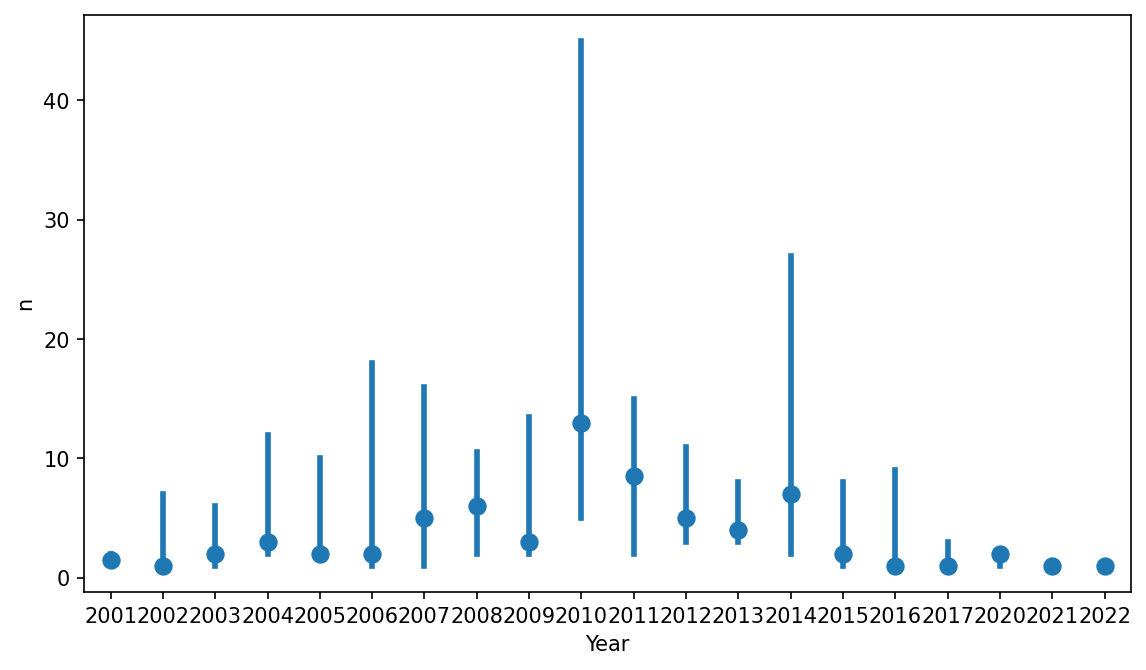

In [15]:
plt.figure(figsize=(9, 5), dpi=150)
sns.pointplot(df_earthquakes_by_year, x="Year", y="n", linestyle="none", estimator="median")

<Axes: xlabel='Growth rate (1/days)', ylabel='Maximum longevity (yrs)'>

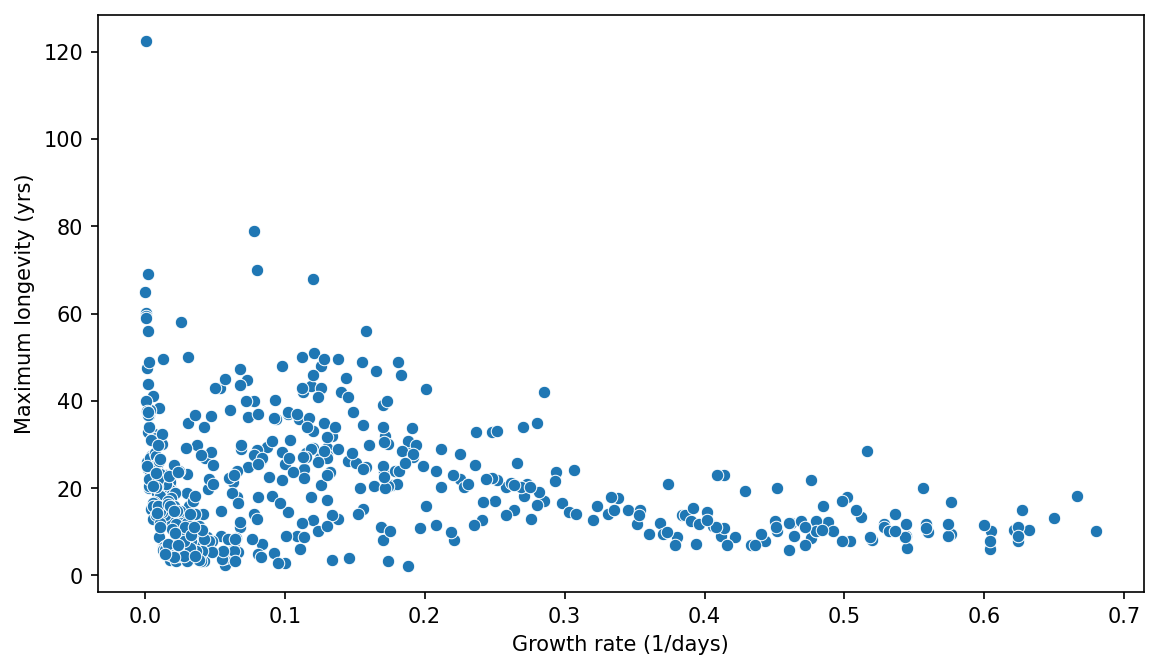

In [20]:
plt.figure(figsize=(9, 5), dpi=150)
sns.scatterplot(
    data=df_anage,
    x="Growth rate (1/days)",
    y="Maximum longevity (yrs)",
)

<Axes: xlabel='Gestation/Incubation (days)', ylabel='Maximum longevity (yrs)'>

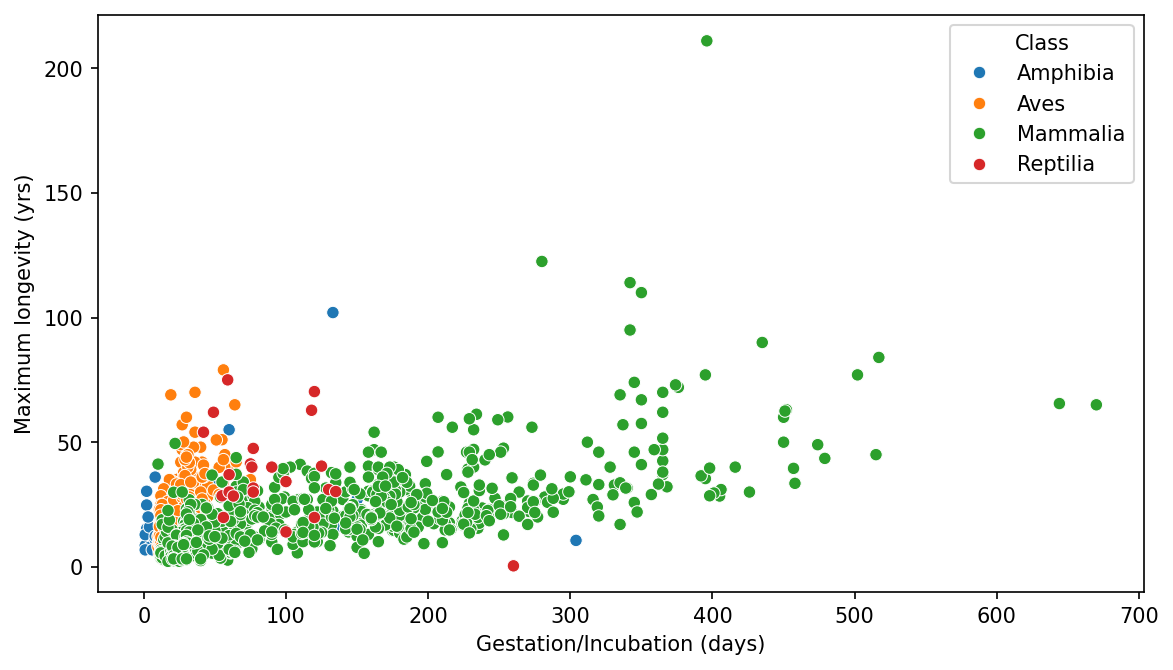

In [ ]:
plt.figure(figsize=(9, 5), dpi=150)
sns.scatterplot(
    data=df_anage.filter(pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"])),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
)

<Axes: xlabel='Gestation/Incubation (days)', ylabel='Maximum longevity (yrs)'>

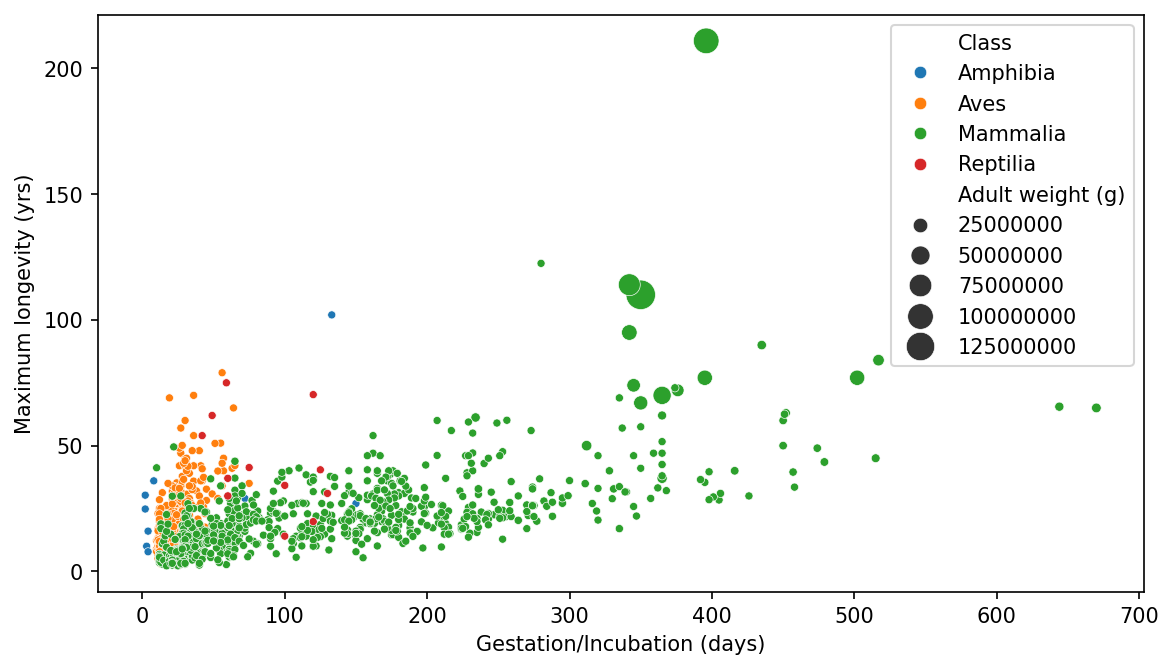

In [27]:
plt.figure(figsize=(9, 5), dpi=150)
sns.scatterplot(
    data=df_anage.filter(pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"])),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    size="Adult weight (g)",
    sizes=(15, 200),
)

<Axes: xlabel='Gestation/Incubation (days)', ylabel='Maximum longevity (yrs)'>

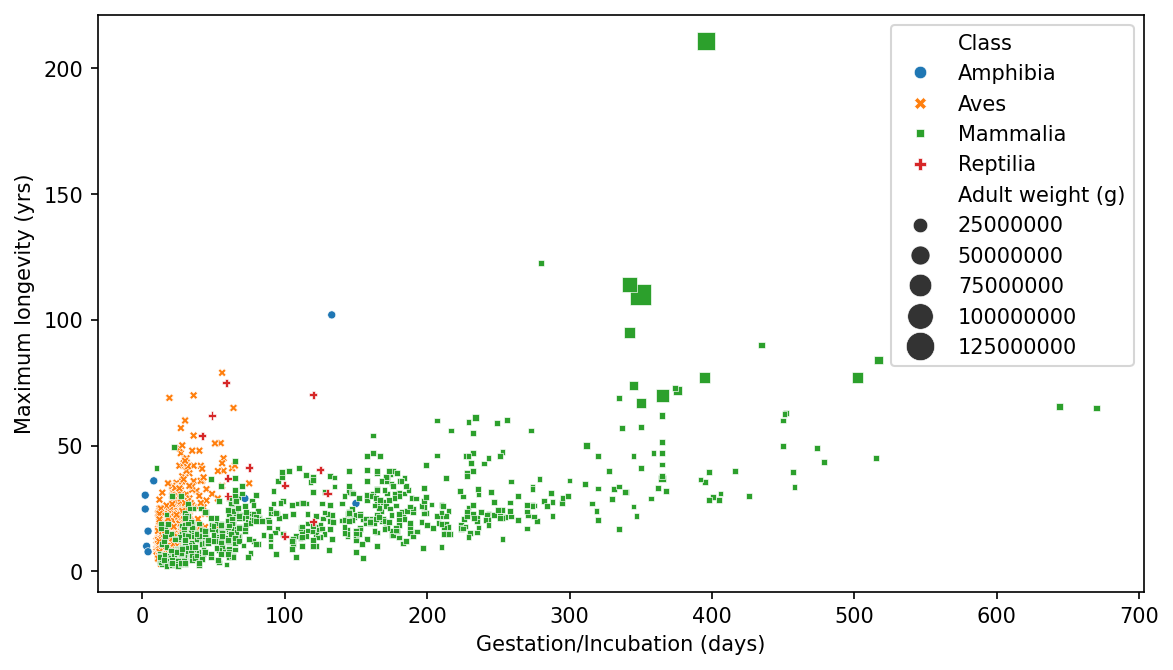

In [28]:
plt.figure(figsize=(9, 5), dpi=150)
sns.scatterplot(
    data=df_anage.filter(pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"])),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    style="Class",
    size="Adult weight (g)",
    sizes=(15, 200),
)

[None, None]

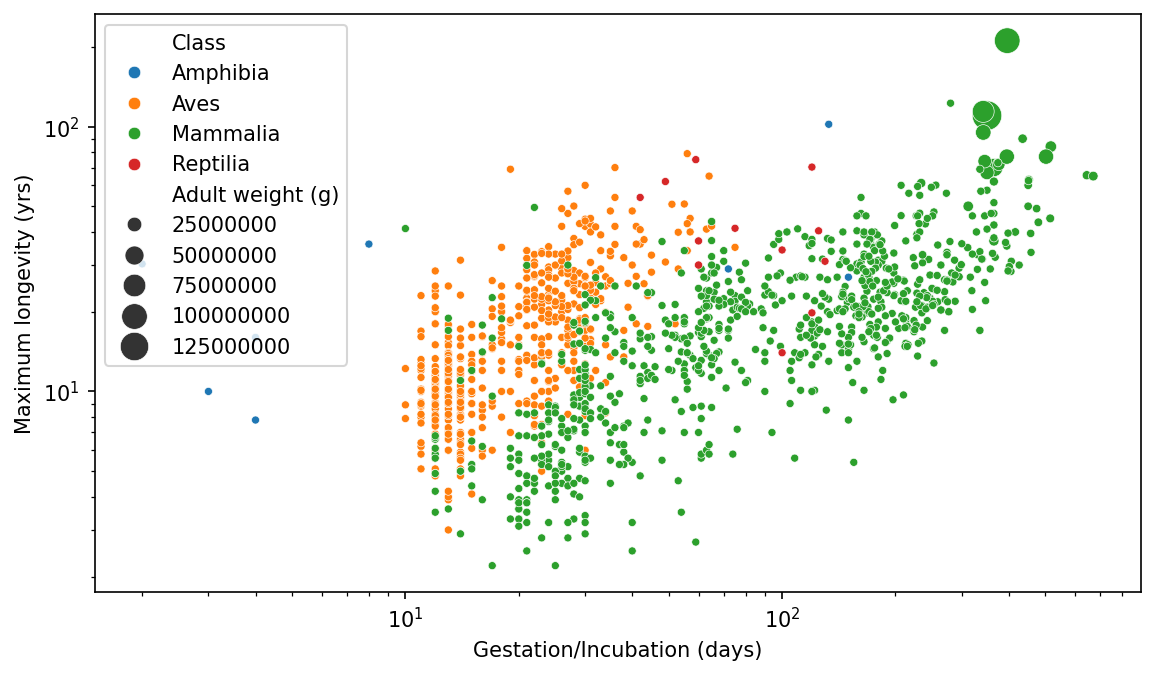

In [30]:
plt.figure(figsize=(9, 5), dpi=150)
sns.scatterplot(
    data=df_anage.filter(pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"])),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    size="Adult weight (g)",
    sizes=(15, 200),
).set(xscale="log", yscale="log")
